# 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Exploring dataset

In [2]:
telCom = pd.read_csv(r"D:\Documents\DA\Data\telecom_churn.csv")
telCom.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Target: based on many features, predict that this company can retain these customer or not.

In [5]:
telCom.shape

(3333, 20)

In [7]:
telCom.columns.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [8]:
telCom.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
telCom.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [11]:
telCom.duplicated().sum()

0

=> no duplicated value

In [12]:
# 3. Cleaning data

In [3]:
df = telCom.copy()

In [13]:
# Visualization

<Axes: xlabel='Area code', ylabel='count'>

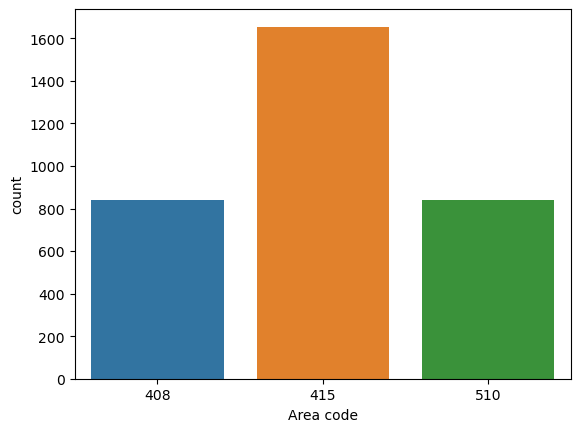

In [16]:
# num of Area code (column chart)
sns.countplot(x='Area code', data=df)

<Axes: ylabel='count'>

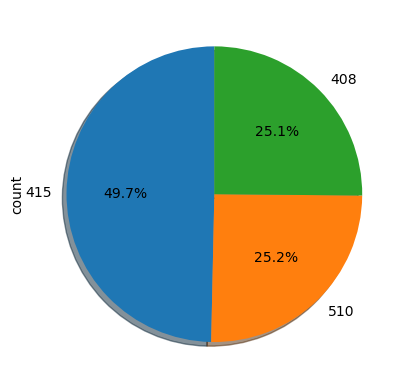

In [18]:
# % of Area code (pie chart)
df['Area code'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)

<Axes: xlabel='Area code', ylabel='count'>

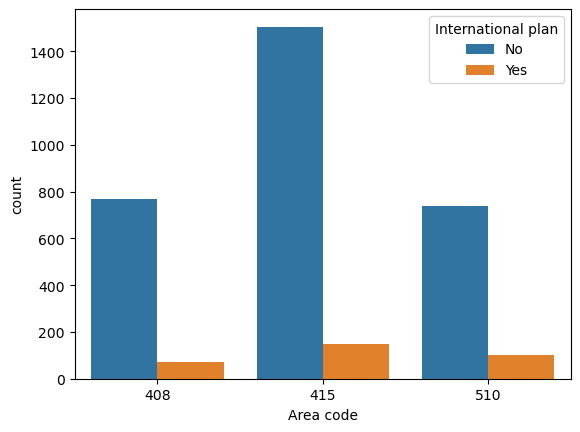

In [21]:
sns.countplot(data=df, x='Area code', hue='International plan')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Numerical features

array([[<Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total day charge'}>]], dtype=object)

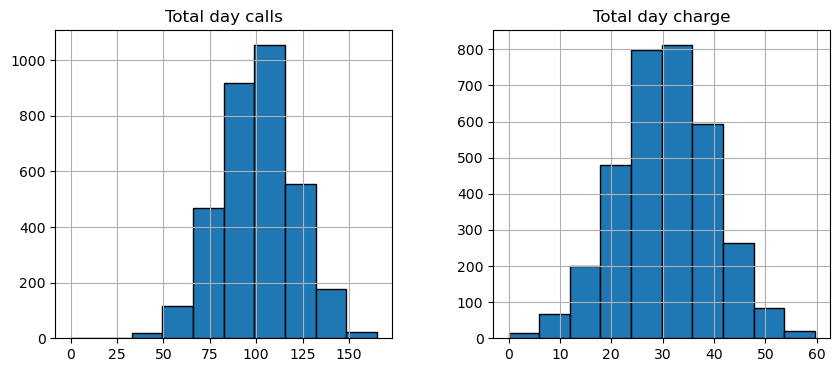

In [8]:
# histpgram: look at distribution of a numerical var
df[['Total day calls', 'Total day charge']].hist(figsize=(10, 4), edgecolor='black')

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

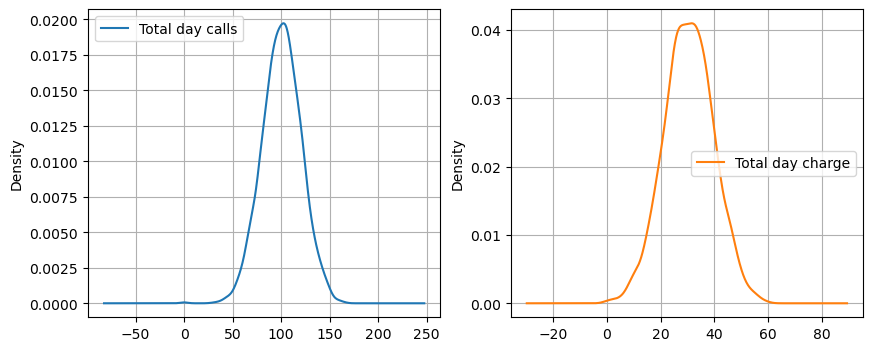

In [16]:
# density plot: grash the ditribution
df[['Total day calls', 'Total day charge']].plot(kind='density', subplots=True, figsize=(10, 4), sharex=False, layout=(1,2), grid=True)


<Axes: xlabel='Total day calls', ylabel='Count'>

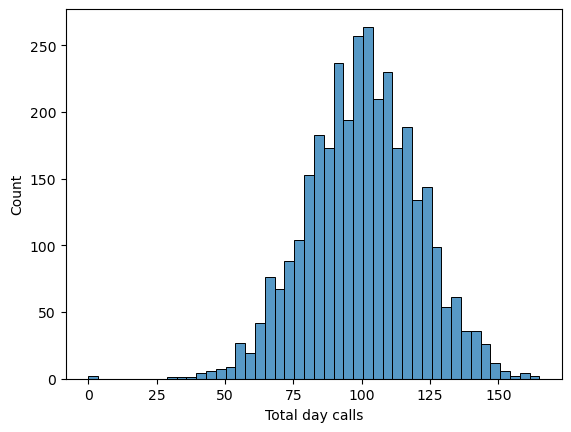

In [22]:
sns.histplot(df['Total day calls'])

<Axes: xlabel='Total day calls'>

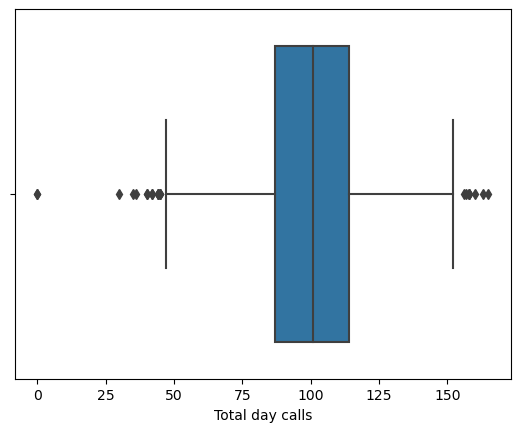

In [27]:
sns.boxplot(x='Total day calls', data=df)

<Axes: >

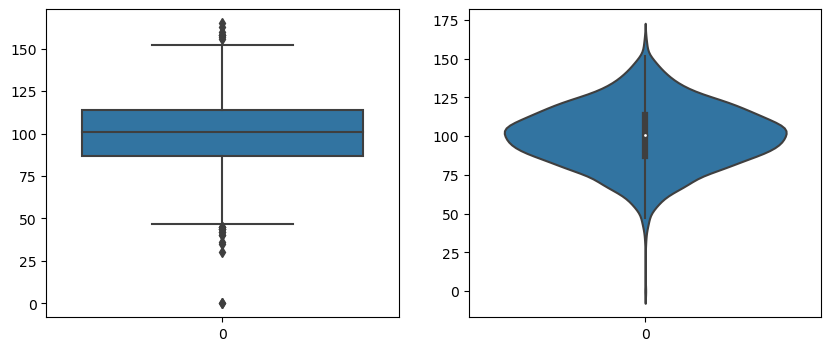

In [41]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(df['Total day calls'], ax=axes[0])
sns.violinplot(df['Total day calls'], ax=axes[1])

In [42]:
# describe(): get the exact numerical statistic of the distribution
df['Total day calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Total day calls, dtype: float64

#### Categorical and binary features

In [44]:
# value_coutns(): frequency table - num of each value in a col (how frequent)
df['Churn'].value_counts()
# -> check data balanced or not

Churn
False    2850
True      483
Name: count, dtype: int64

=> dataset is not balanced

=> may be influent fot future predictions
=> need balance it by changing the dataset

<Axes: xlabel='Area code', ylabel='count'>

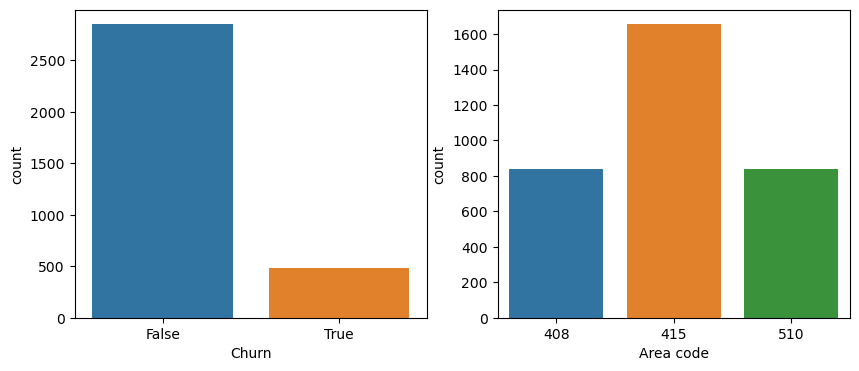

In [5]:
# barplot: for categorical features
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Area code', data=df, ax=axes[1])

<Axes: >

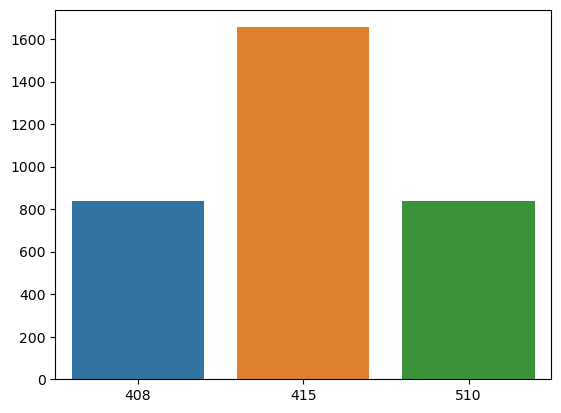

In [8]:
code = df['Area code'].value_counts()
codes = code.index.tolist()
counts = code.tolist()
sns.barplot(x=codes, y=counts)

# Multivariate visualization
relationship bt > 2 diff vars

In [10]:
df.select_dtypes('object').columns

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [11]:
df['Area code'].dtypes

dtype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<Axes: >

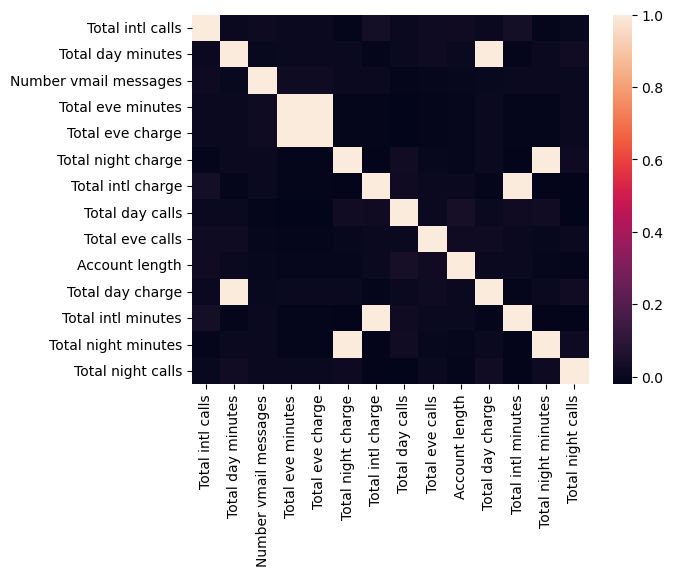

In [30]:
# corr: caculate the correlation bt each pair of features
numerical = list(
    set(df.columns) - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    })
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [5]:
corr_matrix
# correlation: which features are calculated which number
=> can therefore be left out since they do not contribute any additional information

Total intl calls  Total day minutes  \
Total intl calls               1.000000           0.008033   
Total day minutes              0.008033           1.000000   
Number vmail messages          0.013957           0.000778   
Total eve minutes              0.002541           0.007043   
Total eve charge               0.002541           0.007029   
Total night charge            -0.012329           0.004300   
Total intl charge              0.032372          -0.010092   
Total day calls                0.004574           0.006750   
Total eve calls                0.017434           0.015769   
Account length                 0.020661           0.006216   
Total day charge               0.008032           1.000000   
Total intl minutes             0.032304          -0.010155   
Total night minutes           -0.012353           0.004323   
Total night calls              0.000305           0.022972   

                       Number vmail messages  Total eve minutes  \
Total intl calls                    0.013957           0.002541   
Total day minutes                   0.000778           0.007043   
Number vmail messages               1.000000           0.017562   
Total eve minutes                   0.017562           1.000000   
Total eve charge                    0.017578           1.000000   
Total night charge                  0.007663          -0.012593   
Total intl charge                   0.002884          -0.011067   
Total day calls                    -0.009548          -0.021451   
Total eve calls                    -0.005864          -0.011430   
Account length                     -0.004628          -0.006757   
Total day charge                    0.000776           0.007050   
Total intl minutes                  0.002856          -0.011035   
Total night minutes                 0.007681          -0.012584   
Total night calls                   0.007123           0.007586   

                       Total eve charge  Total night charge  \
Total intl calls               0.002541           -0.012329   
Total day minutes              0.007029            0.004300   
Number vmail messages          0.017578            0.007663   
Total eve minutes              1.000000           -0.012593   
Total eve charge               1.000000           -0.012601   
Total night charge            -0.012601            1.000000   
Total intl charge             -0.011074           -0.015186   
Total day calls               -0.021449            0.022927   
Total eve calls               -0.011423           -0.002056   
Account length                -0.006745           -0.008960   
Total day charge               0.007036            0.004301   
Total intl minutes            -0.011043           -0.015214   
Total night minutes           -0.012592            0.999999   
Total night calls              0.007596            0.011188   

                       Total intl charge  Total day calls  Total eve calls  \
Total intl calls                0.032372         0.004574         0.017434   
Total day minutes              -0.010092         0.006750         0.015769   
Number vmail messages           0.002884        -0.009548        -0.005864   
Total eve minutes              -0.011067        -0.021451        -0.011430   
Total eve charge               -0.011074        -0.021449        -0.011423   
Total night charge             -0.015186         0.022927        -0.002056   
Total intl charge               1.000000         0.021666         0.008674   
Total day calls                 0.021666         1.000000         0.006462   
Total eve calls                 0.008674         0.006462         1.000000   
Account length                  0.009546         0.038470         0.019260   
Total day charge               -0.010094         0.006753         0.015769   
Total intl minutes              0.999993         0.021565         0.008703   
Total night minutes            -0.015180         0.022938        -0.002093   
Total night calls              -0.013630        

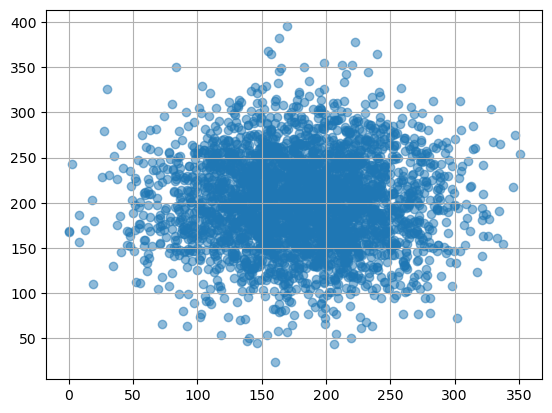

In [9]:
# scatter plot
plt.scatter(x=df['Total day minutes'], y=df['Total night minutes'], alpha=0.5)
plt.grid(True)

=> seem like these features are uncorrelated bc:
eclipse-like shape is alighed with the axes.

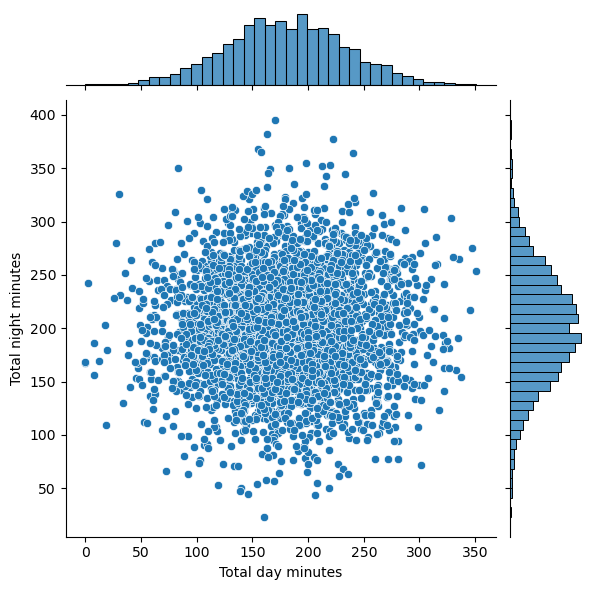

In [14]:
# scatter by sns
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind="scatter")

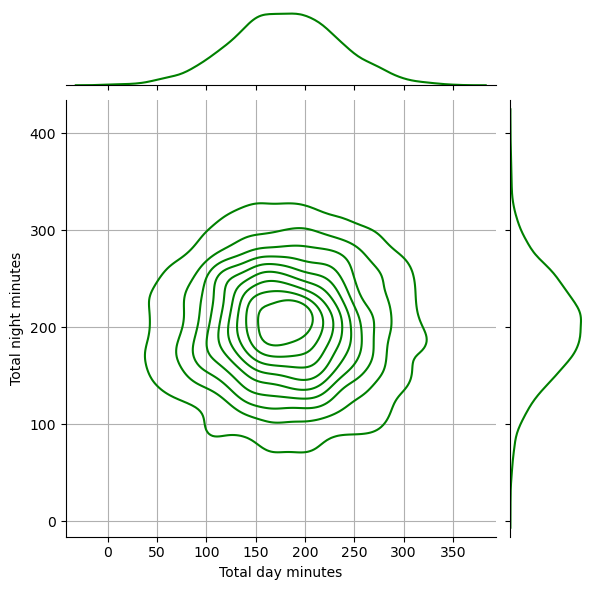

In [20]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='kde', color='g')
plt.grid(True)

D:\AppMore\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


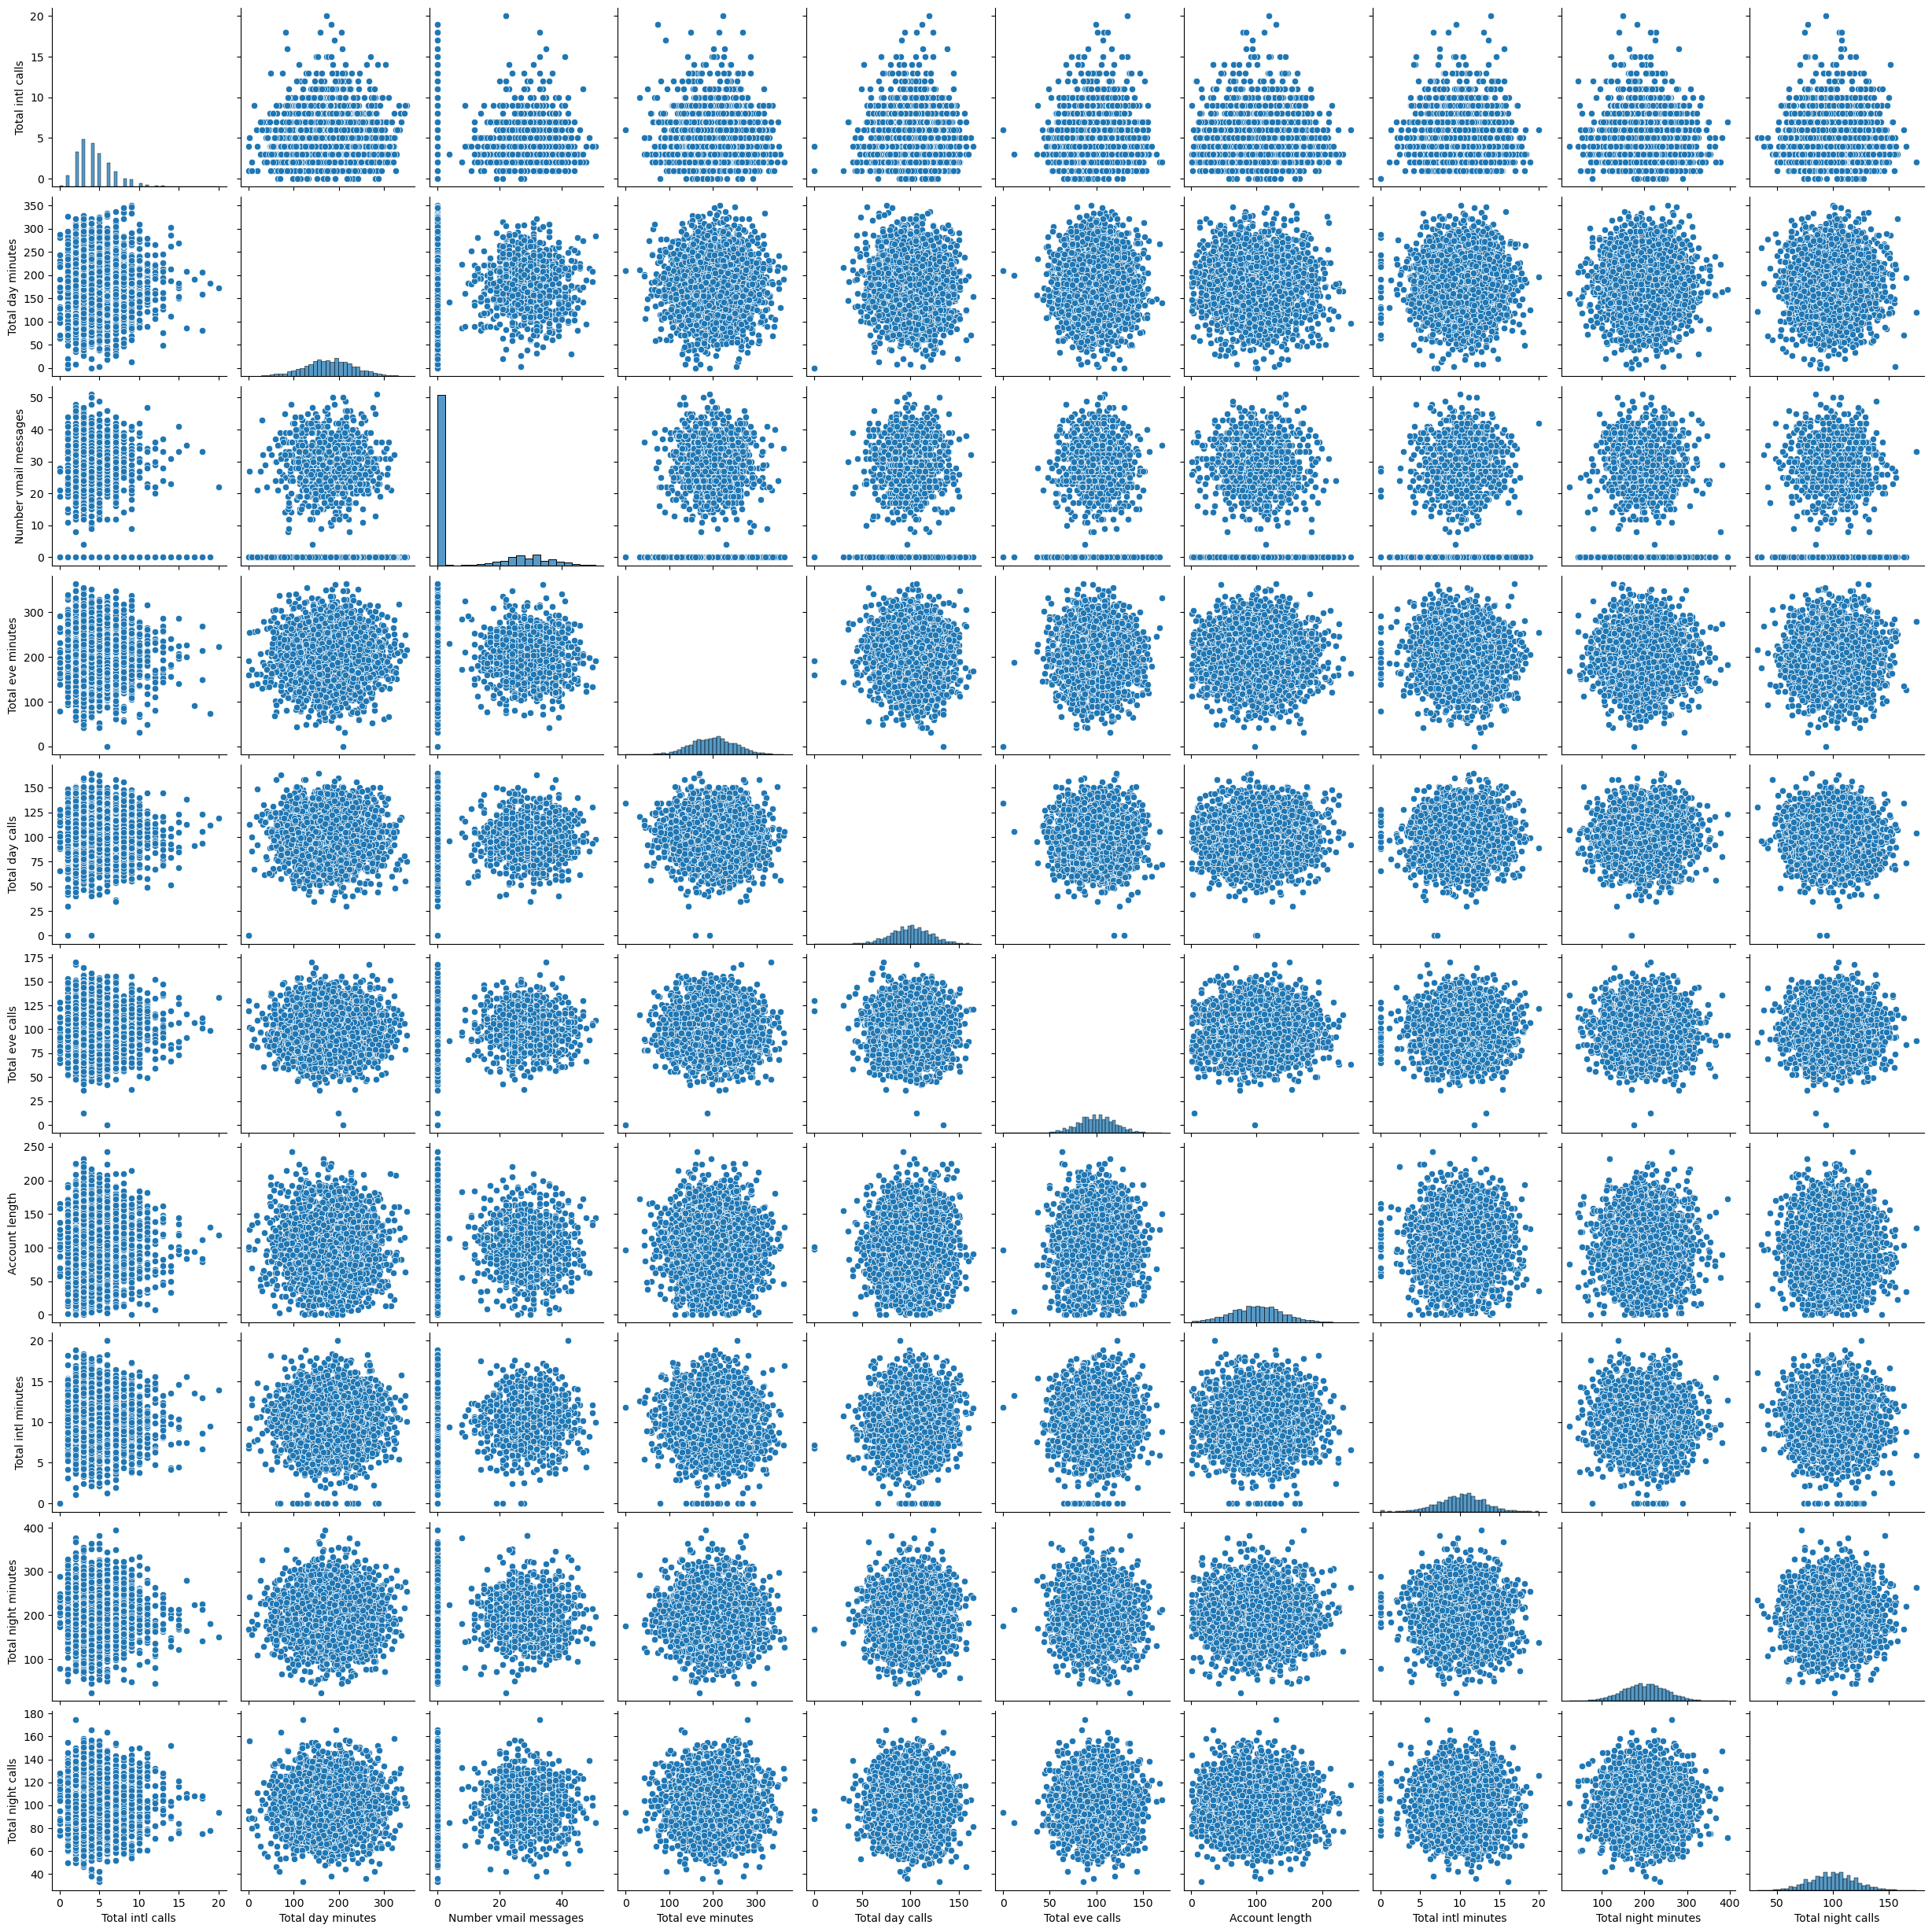

In [31]:
# scatterplot matrix
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

D:\AppMore\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


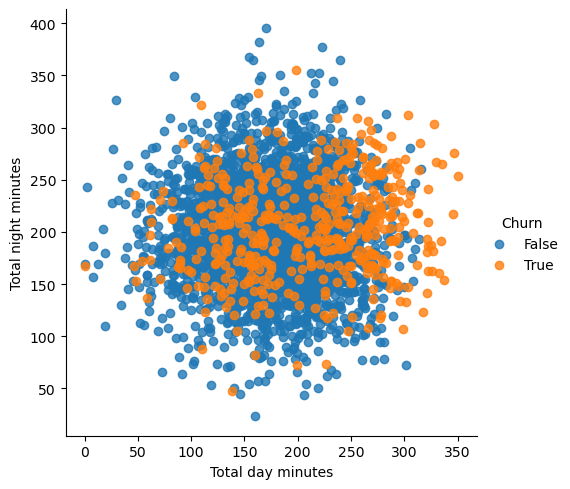

In [25]:
sns.lmplot(x='Total day minutes', y='Total night minutes', data=df, hue="Churn", fit_reg=False)

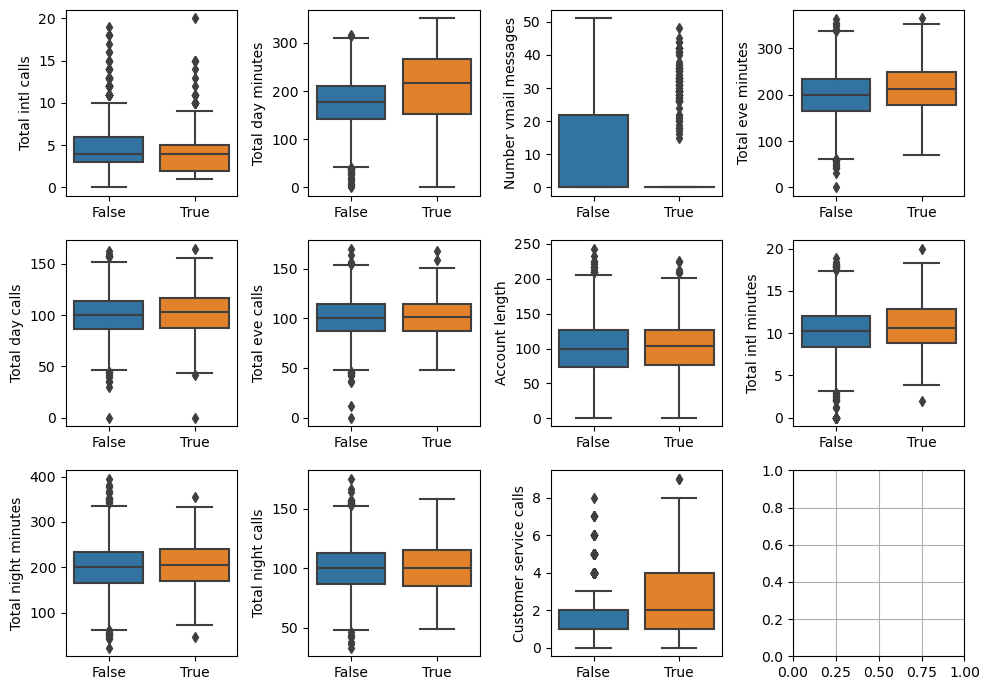

In [32]:
numerical.append("Customer service calls")
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()
# plt.grid(True)